# Задача 9.3

In [22]:
import numpy as np
from scipy import optimize
import scipy.stats as sps
from math import sqrt
from numpy.linalg import inv
import pandas as pd
import random
import matplotlib.pyplot as plt

In [5]:
sample = sps.norm.rvs(size = 100)
gamma = 0.95
alpha = 1 - gamma

#### Для  a при известном $\sigma^2$
$$ P(\bar{X} - z_{1-\alpha/2}\frac{1}{√n} \le a \le \bar{X} + z_{1-\alpha/2}\frac{1}{√n}) = 1 - \alpha$$
$z_{\alpha}$ - квантили нормального распределения

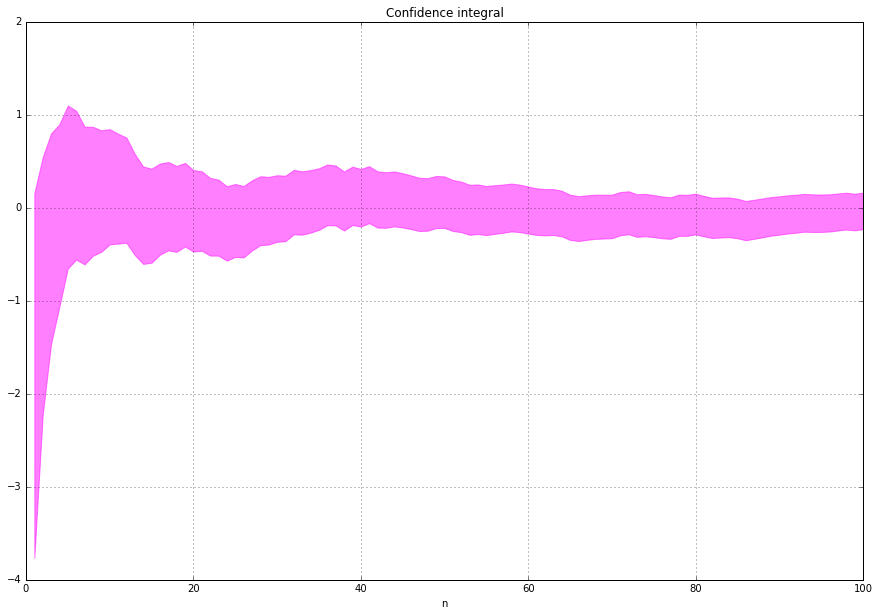

In [16]:
%matplotlib inline
min = list()
max = list()
grid = np.arange(1, 101)
for n in grid:
    min.append(sample[:n].mean()-sps.norm.ppf(1-alpha/2)/sqrt(n))
    max.append(sample[:n].mean()+sps.norm.ppf(1-alpha/2)/sqrt(n))
plt.figure(figsize=(15, 10))
plt.title("Confidence integral")
plt.fill_between(grid, min, max, color='magenta', alpha=0.5)
plt.xlabel("n")
plt.grid()
plt.show()

#### Для  a при неизвестном $\sigma^2$
$$ P(\bar{X} - t_{1-\alpha/2, n-1}\frac{S}{√n} \le a \le \bar{X} + t_{1-\alpha/2, n-1}\frac{S}{√n}) = 1 - \alpha$$
S - несмещенное стандартное отклонение $\sqrt{\frac{\sum{(\bar{x}-x_i)^2}}{n-1}}$
$t_{\alpha, n-1} - \alpha$ квантиль распределения Стьюдента

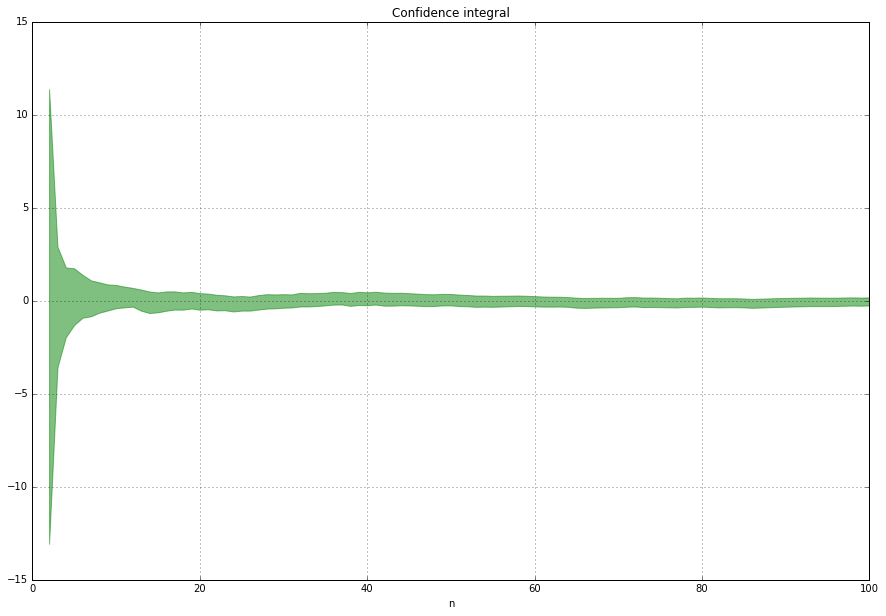

In [23]:
min = list()
max = list()
for n in grid:
    min.append(sample[:n].mean()-sps.t.ppf(1-alpha/2, n-1)*sps.tstd(sample[:n])/sqrt(n))
    max.append(sample[:n].mean()+sps.t.ppf(1-alpha/2, n-1)*sps.tstd(sample[:n])/sqrt(n))
plt.figure(figsize=(15, 10))
plt.title("Confidence integral")
plt.fill_between(grid, min, max, color='green', alpha=0.5)
plt.xlabel("n")
plt.grid()
plt.show()

#### Для  $\sigma^2$ при известном а
$$ P(\frac{\sum x_i^2}{Xi^2_{(1+\alpha)/2, n}} \le \sigma^2 \le \frac{\sum x_i^2}{Xi^2_{(1-\alpha)/2, n}}) =  \alpha$$
$Xi^2_{\alpha, n}$ - квантили распределения $Xi^2(n)$

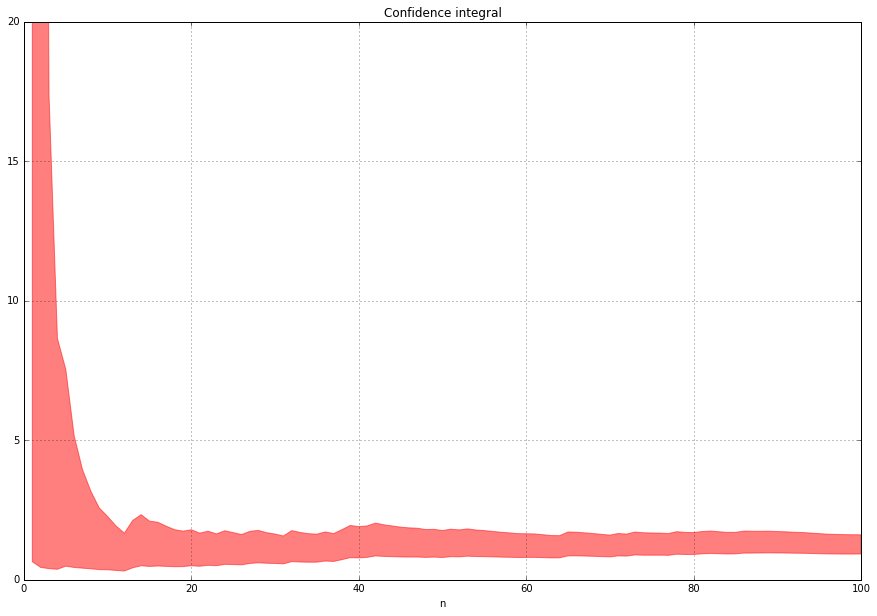

In [34]:
alpha=gamma
min = list()
max = list()
for n in grid:
    min.append(sum([i**2 for i in sample[:n]])/sps.chi2.ppf((1+alpha)/2, n))
    max.append(sum([i**2 for i in sample[:n]])/sps.chi2.ppf((1-alpha)/2, n))
plt.figure(figsize=(15, 10))
plt.title("Confidence integral")
plt.fill_between(grid, min, max, color='red', alpha=0.5)
plt.xlabel("n")
plt.ylim((0, 20))
plt.grid()
plt.show()

#### Для  $\sigma^2$ при неизвестном а
$$ P(\frac{\sum x_i^2S^2}{Xi^2_{(1+\alpha)/2, n-1}} \le \sigma^2 \le \frac{\sum x_i^2S^2}{Xi^2_{(1-\alpha)/2, n-1}}) = \alpha$$

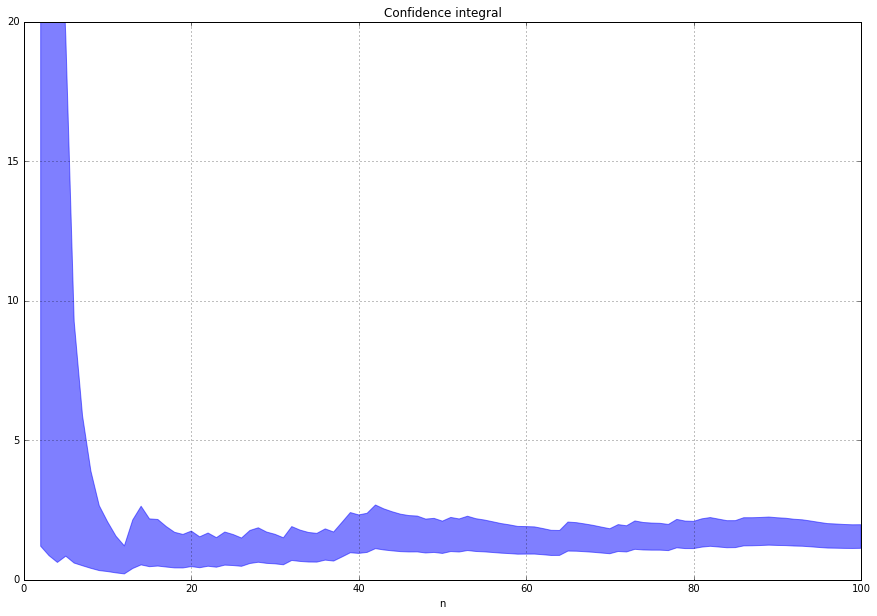

In [33]:
min = list()
max = list()
for n in grid:
    min.append(sum([i ** 2 for i in sample[:n]])*sps.tstd(sample[:n]) ** 2/sps.chi2.ppf((1+alpha)/2, n-1))
    max.append(sum([i ** 2 for i in sample[:n]])*sps.tstd(sample[:n]) ** 2/sps.chi2.ppf((1-alpha)/2, n-1))
plt.figure(figsize=(15, 10))
plt.title("Confidence integral")
plt.fill_between(grid, min, max, color='blue', alpha=0.5)
plt.xlabel("n")
plt.ylim((0, 20))
plt.grid()
plt.show()

Если известен второй параметр распределения, доверительный интервал для первого получается уже.